In [2]:
import pyddm.plot
from pyddm import Model, set_N_cpus
from pyddm.models import DriftConstant, DriftLinear, NoiseConstant,Bound,Drift, BoundConstant, OverlayNonDecision, ICPointSourceCenter,BoundCollapsingLinear
from pyddm.functions import fit_adjust_model, display_model

from pyddm import Fittable, Fitted, Sample
from pyddm.models import LossRobustBIC, LossBIC, LossLikelihood, LossRobustLikelihood,LossSquaredError
from pyddm.functions import fit_adjust_model


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import scipy
from statannot import add_stat_annotation
import glob

from sbi import utils
from scipy import stats

%matplotlib inline

<Axes: title={'center': 'Diffusion Decision Model'}>

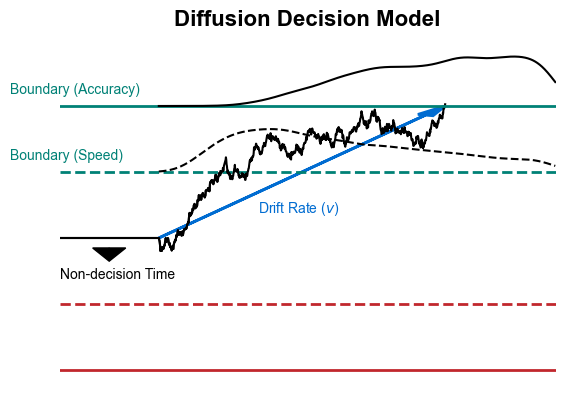

In [6]:
def DDM_SAT_plot(ax=None):
    if ax is None:
        ax = plt.gca()
    T_dur = 1.5
    
    ### speed condition
    model = Model(name='Simple model',
                  drift=DriftConstant(drift=1),
                  noise=NoiseConstant(noise=1),
                  bound=BoundConstant(B=1),
                  overlay=OverlayNonDecision(nondectime=.3),
                  dx=.001, dt=.001, T_dur=T_dur)
    sol = model.solve()
    samp = sol.resample(10000)
    samps = samp.to_pandas_dataframe(drop_undecided = True, choice_column_name='correct')

    evidence = model.simulate_trial(seed=1)
    t = np.arange(len(evidence))/1000
    t_kde = np.arange(300,T_dur*1000)/1000
    #print(samps)

    c_prop = sum(samps['correct']==1)/len(samps['correct'])
    i_prop = sum(samps['correct']==0)/len(samps['correct'])

    kde_c = stats.gaussian_kde(samps[samps['correct']==1]['RT'])(t_kde)*c_prop
    kde_i = stats.gaussian_kde(samps[samps['correct']==0]['RT'])(t_kde)*i_prop
    
    ax.plot(t,evidence, color = 'black')
    
    # drift rate
    #ax.arrow(x=0.3, y=0, dx=(t[-1]-0.3), dy=1, 
    #          head_width=0.05, head_length=0.15,
    #          color = '#006CD1',length_includes_head = True, linewidth = 2)
    ax.text(x=0.6, y=0.4, s = "Drift Rate ($v$)", color = '#006CD1', font = "Arial", size = 10)
    
    # boundaries
    boundary = 2
    line1 = ax.axhline(y = 1, color = '#008176',linewidth = 2, linestyle = 'dashed', label = "Boundary (Speed)")
    ax.plot(t_kde,kde_c/2+1,color = "black" ,linestyle = 'dashed')

    line2 = ax.axhline(y = -1, color = '#c1272d',linewidth = 2, linestyle = 'dashed')
    
    ax.text(x=-0.15, y=2.2, s = "Boundary (Accuracy)", color = '#008176', font = "Arial", size = 10)
    ax.text(x=-0.15, y=1.2, s = "Boundary (Speed)", color = '#008176', font = "Arial", size = 10)
    
    ### accuracy condition
    model = Model(name='Simple model',
                  drift=DriftConstant(drift=1),
                  noise=NoiseConstant(noise=1),
                  bound=BoundConstant(B=2),
                  overlay=OverlayNonDecision(nondectime=.3),
                  dx=.001, dt=.001, T_dur=T_dur)
    sol = model.solve()
    samp = sol.resample(10000)
    samps = samp.to_pandas_dataframe(drop_undecided = True, choice_column_name='correct')

    evidence = model.simulate_trial(seed=1)
    t = np.arange(len(evidence))/1000
    t_kde = np.arange(300,T_dur*1000)/1000
    
    c_prop = sum(samps['correct']==1)/len(samps['correct'])
    i_prop = sum(samps['correct']==0)/len(samps['correct'])

    kde_c = stats.gaussian_kde(samps[samps['correct']==1]['RT'])(t_kde)*c_prop
    kde_i = stats.gaussian_kde(samps[samps['correct']==0]['RT'])(t_kde)*i_prop
    
    ax.plot(t,evidence, color = 'black')
    
    # drift rate
    ax.arrow(x=0.3, y=0, dx=(t[-1]-0.3), dy=2, 
              head_width=0.05, head_length=0.15,
              color = '#006CD1',length_includes_head = True, linewidth = 2)

    # boundaries
    line3 = ax.axhline(y = 2, color = '#008176',linewidth = 2, label = "Boundary (Accuracy)")
    ax.plot(t_kde,kde_c/2+2,color = "black")#,linestyle = 'dotted')
    
    line4 = ax.axhline(y = -2, color = '#c1272d',linewidth = 2)

    
    # plot limit
    ax.set_xlim(0,T_dur)
    ax.set_ylim(-2.5,3.1)
    ax.axis('off')
    ax.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
    ax.set_title("Diffusion Decision Model", font = "Arial", size = 16, weight='bold')

    # ndt
    ax.arrow(x=0.15, y=-0.15, dx=0, dy=-0.001, color = 'black',
              head_width=0.1, head_length=0.2)
    ax.text(x=0, y=-0.6, s = "Non-decision Time", font = "Arial", size = 10)
    #ax.legend(handles=[line1, line3], loc = "upper left")

    return(ax)
DDM_SAT_plot()

In [4]:
print(sns.color_palette("flare").as_hex())


['#e98d6b', '#e3685c', '#d14a61', '#b13c6c', '#8f3371', '#6c2b6d']


In [ ]:
model = Model(name='Simple model',
              drift=DriftLinear(drift=0.3,x = 10, t = 0),
              noise=NoiseConstant(noise=1),
              bound=BoundConstant(B=2),
              overlay=OverlayNonDecision(nondectime=.3),
              dx=.001, dt=.001, T_dur=3)
sol = model.solve()
#samp = sol.resample(10000)
#samps = samp.to_pandas_dataframe(drop_undecided = True)



In [137]:
evidence.shape

(524,)

In [ ]:
evidence_trials = np.array(())

In [136]:
for i in range(1000):
    evidence = model.simulate_trial(seed=i)


array([-2.20268248e-13, -2.20268248e-13, -2.20268248e-13, -2.20268248e-13,
       -2.20268248e-13, -2.20268248e-13, -2.20268248e-13, -2.20268248e-13,
       -2.20268248e-13, -2.20268248e-13, -2.20268248e-13, -2.20268248e-13,
       -2.20268248e-13, -2.20268248e-13, -2.20268248e-13, -2.20268248e-13,
       -2.20268248e-13, -2.20268248e-13, -2.20268248e-13, -2.20268248e-13,
       -2.20268248e-13, -2.20268248e-13, -2.20268248e-13, -2.20268248e-13,
       -2.20268248e-13, -2.20268248e-13, -2.20268248e-13, -2.20268248e-13,
       -2.20268248e-13, -2.20268248e-13, -2.20268248e-13, -2.20268248e-13,
       -2.20268248e-13, -2.20268248e-13, -2.20268248e-13, -2.20268248e-13,
       -2.20268248e-13, -2.20268248e-13, -2.20268248e-13, -2.20268248e-13,
       -2.20268248e-13, -2.20268248e-13, -2.20268248e-13, -2.20268248e-13,
       -2.20268248e-13, -2.20268248e-13, -2.20268248e-13, -2.20268248e-13,
       -2.20268248e-13, -2.20268248e-13, -2.20268248e-13, -2.20268248e-13,
       -2.20268248e-13, -

<Axes: title={'center': 'Ornstein-Uhlenbeck Model'}>

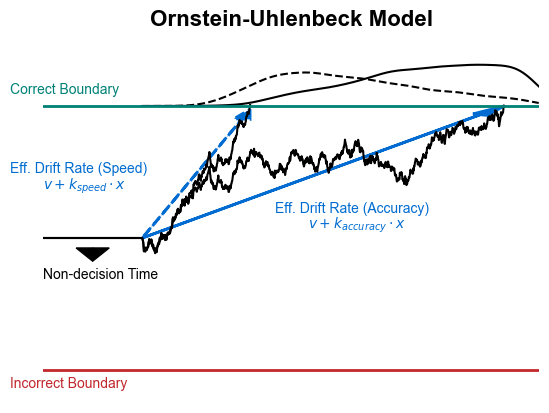

In [4]:
def OUM_SAT_plot(ax=None):
    if ax is None:
        ax = plt.gca()
    T_dur = 1.5
    ## speed
    model = Model(name='Simple model',
                  drift=DriftLinear(drift=0.3,x = 3, t = 0),
                  noise=NoiseConstant(noise=1),
                  bound=BoundConstant(B=2),
                  overlay=OverlayNonDecision(nondectime=.3),
                  dx=.001, dt=.001, T_dur=T_dur)
    sol = model.solve()
    samp = sol.resample(10000)
    samps = samp.to_pandas_dataframe(drop_undecided = True, choice_column_name='correct')

    evidence = model.simulate_trial(seed=1)
    t = np.arange(len(evidence))/1000
    t_kde = np.arange(300,T_dur*1000)/1000

    c_prop = sum(samps['correct']==1)/len(samps['correct'])
    i_prop = sum(samps['correct']==0)/len(samps['correct'])

    kde_c = stats.gaussian_kde(samps[samps['correct']==1]['RT'])(t_kde)*c_prop
    kde_i = stats.gaussian_kde(samps[samps['correct']==0]['RT'])(t_kde)*i_prop
    
    ax.plot(t,evidence, color = 'black')
    
    ax.plot(t_kde,kde_c/2+2,color = "black",linestyle = 'dashed')
    
    # drift rate
    line1 = ax.arrow(x=0.3, y=0, dx=(t[-1]-0.3), dy=1.95, 
              head_width=0.05, head_length=0.15,
              color = '#006CD1',length_includes_head = True,linestyle = 'dashed', linewidth = 2, label = "Speed")
    
    ## accuracy
    model = Model(name='Simple model',
                  drift=DriftLinear(drift=0.3,x = 0, t = 0),
                  noise=NoiseConstant(noise=1),
                  bound=BoundConstant(B=2),
                  overlay=OverlayNonDecision(nondectime=.3),
                  dx=.001, dt=.001, T_dur=T_dur)
    sol = model.solve()
    samp = sol.resample(10000)
    samps = samp.to_pandas_dataframe(drop_undecided = True, choice_column_name='correct')

    evidence = model.simulate_trial(seed=1)
    t = np.arange(len(evidence))/1000
    t_kde = np.arange(300,T_dur*1000)/1000

    c_prop = sum(samps['correct']==1)/len(samps['correct'])
    i_prop = sum(samps['correct']==0)/len(samps['correct'])

    kde_c = stats.gaussian_kde(samps[samps['correct']==1]['RT'])(t_kde)*c_prop
    kde_i = stats.gaussian_kde(samps[samps['correct']==0]['RT'])(t_kde)*i_prop
    
    ax.plot(t,evidence, color = 'black')
    
    ax.plot(t_kde,kde_c/2+2,color = "black")#,linestyle = 'dotted')
    
    # drift rate
    line2 = ax.arrow(x=0.3, y=0, dx=(t[-1]-0.3), dy=2, 
              head_width=0.05, head_length=0.15,
              color = '#006CD1',length_includes_head = True, linewidth = 2, label = "Accuracy")
    

    # boundaries
    ax.axhline(y = 2, color = '#008176',linewidth = 2)
    ax.text(x=-0.1, y=2.2, s = "Correct Boundary", color = '#008176', font = "Arial", size = 10)

    ax.axhline(y = -2, color = '#c1272d',linewidth = 2)
    ax.text(x=-0.1, y=-2.26, s = "Incorrect Boundary", color = '#c1272d', font = "Arial", size = 10)
    
    # plot limit
    ax.set_xlim(0,T_dur)
    ax.set_ylim(-2.5,3.1)
    ax.axis('off')
    ax.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
    ax.set_title("Ornstein-Uhlenbeck Model", font = "Arial", size = 16, weight='bold')


    # ndt
    ax.arrow(x=0.15, y=-0.15, dx=0, dy=-0.001, color = 'black',
              head_width=0.1, head_length=0.2)
    ax.text(x=0, y=-0.6, s = "Non-decision Time", font = "Arial", size = 10)
    
    # leakage or self-excitation
    ax.text(x=-0.1, y=1, s = "Eff. Drift Rate (Speed)", color = '#006CD1', font = "Arial", size = 10)
    ax.text(x=0, y=0.75, s = "$v + k_{speed}\cdot x$", color = '#006CD1', font = "Arial", size = 10)

    
    ax.text(x=0.7, y=0.4, s = "Eff. Drift Rate (Accuracy)", color = '#006CD1', font = "Arial", size = 10)
    ax.text(x=0.8, y=0.15, s = "$v + k_{accuracy}\cdot x$", color = '#006CD1', font = "Arial", size = 10)

    # legend
    line1 = ax.axhline(y = 200, color = '#006CD1',linewidth = 2, linestyle = 'dashed',label = "Effective Drift Rate (Speed)")
    line2 = ax.axhline(y = 200, color = '#006CD1',linewidth = 2, label = "Effective Drift Rate (Accuracy)")

    return(ax)
OUM_SAT_plot()

Text(0, 3.5, 'b')

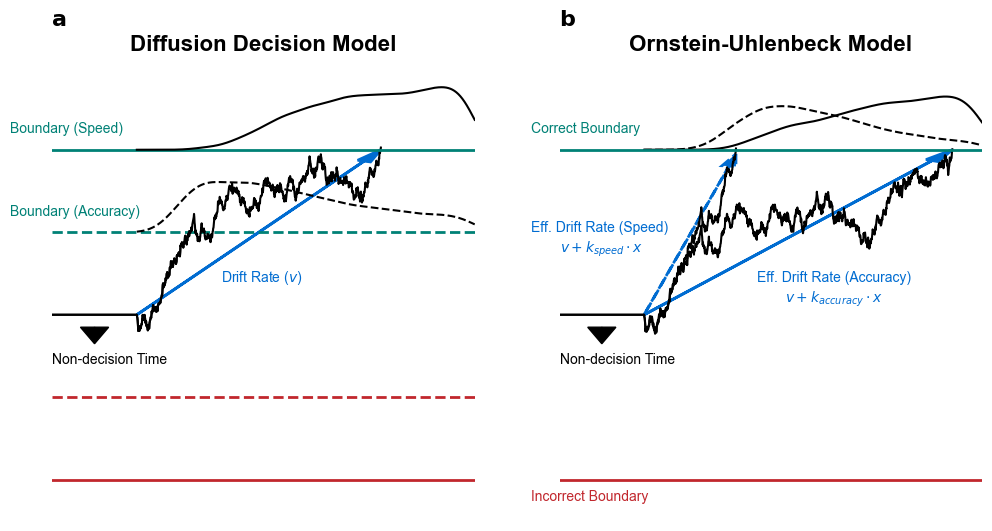

In [19]:
fig, axes = plt.subplots(1,2,figsize=(12, 6))
DDM_SAT_plot(ax=axes[0])
OUM_SAT_plot(ax=axes[1])
plt.text(x=-1.8,y=3.5, s="a", fontsize = 16, weight='bold')
plt.text(x=0,y=3.5, s="b", fontsize = 16, weight='bold')

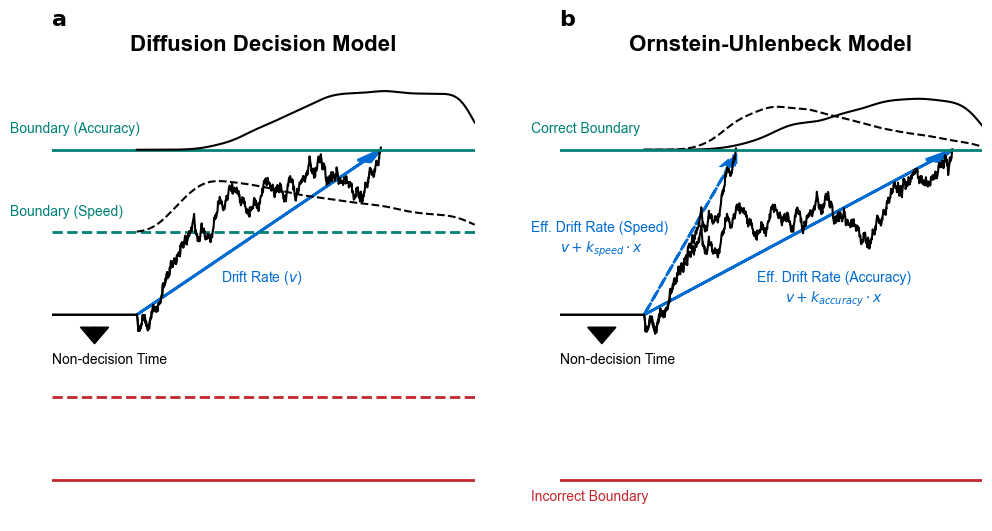

In [7]:
fig, axes = plt.subplots(1,2,figsize=(12, 6))
DDM_SAT_plot(ax=axes[0])
OUM_SAT_plot(ax=axes[1])
plt.rcParams['pdf.fonttype']=42
plt.rcParams['ps.fonttype']=42

plt.text(x=-1.8,y=3.5, s="a", fontsize = 16, weight='bold')
plt.text(x=0,y=3.5, s="b", fontsize = 16, weight='bold')

plt.savefig("/Users/wangjiashun/Desktop/Research_on_SAT/Draft/Figures/fig1ab.pdf")

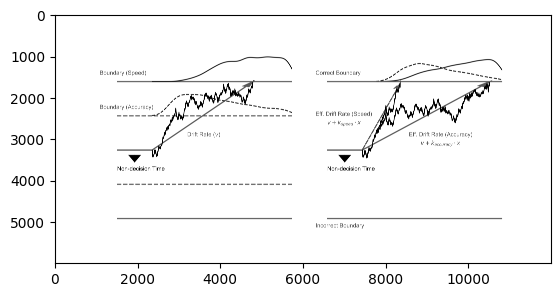

In [93]:
from PIL import Image

fname = "/Users/wangjiashun/Desktop/Research_on_SAT/Draft/Figures/fig1a.png"
image = Image.open(fname).convert("L")
arr = np.asarray(image)
plt.imshow(arr, cmap='gray', vmin=0, vmax=255)
plt.show()

In [96]:
def SAT_plot(DDM_params, OUM_params,ax=None):
    if ax is None:
        ax = plt.gca()
    T_dur = 1.5
    
    ### DDM
    model = Model(name='Simple model',
                  drift=DriftConstant(drift=DDM_params[0]),
                  noise=NoiseConstant(noise=1),
                  bound=BoundConstant(B=DDM_params[1]),
                  overlay=OverlayNonDecision(nondectime=DDM_params[2]),
                  dx=.001, dt=.001, T_dur=T_dur)
    sol = model.solve()
    samp = sol.resample(10000)
    samps = samp.to_pandas_dataframe(drop_undecided = True, choice_column_name='correct')

    evidence = model.simulate_trial(seed=1)
    t = np.arange(len(evidence))/1000
    t_kde = np.arange(0,T_dur*1000)/1000
    #print(samps)

    c_prop = sum(samps['correct']==1)/len(samps['correct'])
    i_prop = sum(samps['correct']==0)/len(samps['correct'])


    kde_c = stats.gaussian_kde(samps[samps['correct']==1]['RT'])(t_kde)*c_prop
    kde_i = stats.gaussian_kde(samps[samps['correct']==0]['RT'])(t_kde)*i_prop
    line1 = ax.plot(t_kde,kde_c/2+1, color = '#0E8585', label = "DDM")
    RT_quantiles = np.quantile(samps[samps['correct']==1]['RT'], [0.1,0.3,0.5,0.7,0.9], axis=0)
    ax.scatter(RT_quantiles, stats.gaussian_kde(samps[samps['correct']==1]['RT'])(RT_quantiles)*c_prop/2+1,
               edgecolor="#0E8585", facecolor = "#0E8585",marker = "x")

    ### OUM
    model = Model(name='Simple model',
                  drift=DriftLinear(drift=OUM_params[0],x = OUM_params[2], t = 0),
                  noise=NoiseConstant(noise=1),
                  bound=BoundConstant(B=OUM_params[1]),
                  overlay=OverlayNonDecision(nondectime=OUM_params[3]),
                  dx=.001, dt=.001, T_dur=T_dur)
    sol = model.solve()
    samp = sol.resample(10000)
    samps = samp.to_pandas_dataframe(drop_undecided = True, choice_column_name='correct')

    evidence = model.simulate_trial(seed=1)
    t = np.arange(len(evidence))/1000
    t_kde = np.arange(0,T_dur*1000)/1000
    #print(samps)

    c_prop = sum(samps['correct']==1)/len(samps['correct'])
    i_prop = sum(samps['correct']==0)/len(samps['correct'])

    kde_c = stats.gaussian_kde(samps[samps['correct']==1]['RT'])(t_kde)*c_prop
    kde_i = stats.gaussian_kde(samps[samps['correct']==0]['RT'])(t_kde)*i_prop
    line2 = ax.plot(t_kde,kde_c/2+1, color = '#7262ac', label = "OUM")
    RT_quantiles = np.quantile(samps[samps['correct']==1]['RT'], [0.1,0.3,0.5,0.7,0.9], axis=0)
    ax.scatter(RT_quantiles, stats.gaussian_kde(samps[samps['correct']==1]['RT'])(RT_quantiles)*c_prop/2+1,
               edgecolor="#7262ac", facecolor = "#7262ac",marker = "x")

    #ax.arrow(x=0.8, y=1.2, dx=-0.06, dy=0, color = 'black',head_width=0.03, head_length=0.03)

    # plot limit
    #ax.axis('off')
    ax.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
    ax.legend(frameon=False)
    ax.set_xlabel("RT")
    ax.set_ylabel("Density")

    ax.spines[['right', 'top']].set_visible(False)


    return(ax)


/var/folders/5g/vqmn12yd48z6l6jf2s2yy62r0000gn/T/ipykernel_58568/3140514595.py:30: UserWarning: You passed a edgecolor/edgecolors ('#0E8585') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(RT_quantiles, stats.gaussian_kde(samps[samps['correct']==1]['RT'])(RT_quantiles)*c_prop/2+1,
/var/folders/5g/vqmn12yd48z6l6jf2s2yy62r0000gn/T/ipykernel_58568/3140514595.py:56: UserWarning: You passed a edgecolor/edgecolors ('#7262ac') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(RT_quantiles, stats.gaussian_kde(samps[samps['correct']==1]['RT'])(RT_quantiles)*c_prop/2+1,


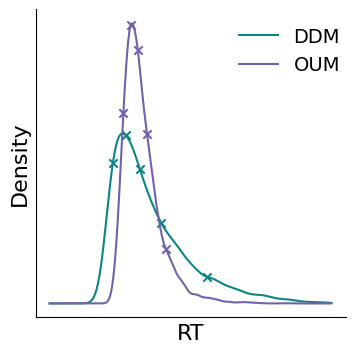

In [116]:
DDM_params = [1.99, 0.68, 0.24]
OUM_params = [1.98, 3.12,9.60, 0.20]
fig, ax = plt.subplots(1,1,figsize = (4,4))
SAT_plot(DDM_params, OUM_params, ax = ax)

ax.set_xlabel("RT", fontsize = 16)
ax.set_ylabel("Density", fontsize = 16)
ax.legend(loc='upper left', bbox_to_anchor=(0.6, 1),fontsize=14, frameon=False)
#plt.savefig('/Users/wangjiashun/Desktop/Figure1a.pdf')

In [41]:
samps[samps['correct']==1]/len(samps['correct'])

,correct,RT
0,0.0001,0.000056
1,0.0001,0.000071
2,0.0001,0.000051
3,0.0001,0.000041
4,0.0001,0.000058
...,...,...
8102,0.0001,0.000045
8103,0.0001,0.000050
8104,0.0001,0.000036
8105,0.0001,0.000039


array([0.39217418, 0.43049804, 0.46676375, 0.51288134, 0.61336865])

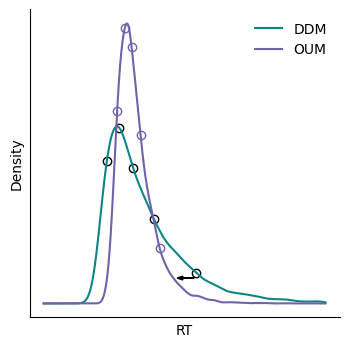

In [62]:
T_dur = 1.5
fig, ax = plt.subplots(1,1,figsize = (4,4))

    


Text(0.5, 1.0, 'RT Distributions')

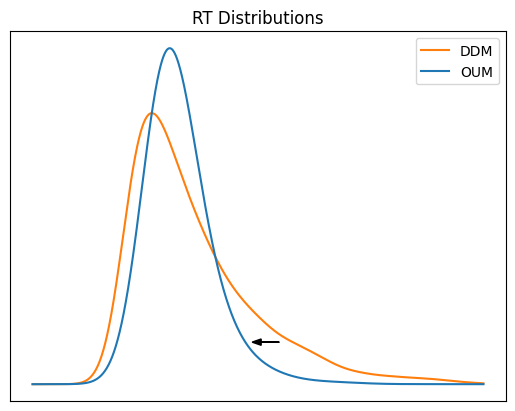

In [47]:

ax = plt.gca()
T_dur = 1.5

### DDM
model = Model(name='Simple model',
              drift=DriftConstant(drift=DDM_params[0]),
              noise=NoiseConstant(noise=1),
              bound=BoundConstant(B=DDM_params[1]),
              overlay=OverlayNonDecision(nondectime=DDM_params[2]),
              dx=.001, dt=.001, T_dur=T_dur)
sol = model.solve()
samp = sol.resample(10000)
samps = samp.to_pandas_dataframe(drop_undecided = True, choice_column_name='correct')
samps["correct"] = samps["correct"]*2-1
samps["RT"] = samps["RT"]*samps["correct"]

t_kde = np.arange(0,T_dur*1000)/1000

kde_c = stats.gaussian_kde(samps["RT"])(t_kde)
line1 = ax.plot(t_kde,kde_c/2+1, color = '#ff7f0e', label = "DDM")

### OUM
model = Model(name='Simple model',
              drift=DriftLinear(drift=OUM_params[0],x = OUM_params[2], t = 0),
              noise=NoiseConstant(noise=1),
              bound=BoundConstant(B=OUM_params[1]),
              overlay=OverlayNonDecision(nondectime=OUM_params[3]),
              dx=.001, dt=.001, T_dur=T_dur)
sol = model.solve()
samp = sol.resample(10000)
samps = samp.to_pandas_dataframe(drop_undecided = True, choice_column_name='correct')
samps["correct"] = samps["correct"]*2-1
samps["RT"] = samps["RT"]*samps["correct"]

#print(samps)
kde_c = stats.gaussian_kde(samps["RT"])(t_kde)

line2 = ax.plot(t_kde,kde_c/2+1, color = '#1f77b4', label = "OUM")

# ndt
ax.arrow(x=0.82, y=1.2, dx=-0.06, dy=0, color = 'black',
          head_width=0.03, head_length=0.03)
#ax.text(x=0, y=-0.6, s = "Non-decision Time")

# plot limit
#ax.axis('off')
ax.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
#ax.set_title("Drift-Diffusion Model")
ax.legend()
ax.set_title("RT Distributions")

In [59]:
samps["RT"]

0       0.345814
1       0.603337
2       0.554357
3       0.462448
4       0.710665
          ...   
9960    0.392057
9961    0.762367
9962    0.508724
9963    0.424875
9964    0.459379
Name: RT, Length: 9965, dtype: float64

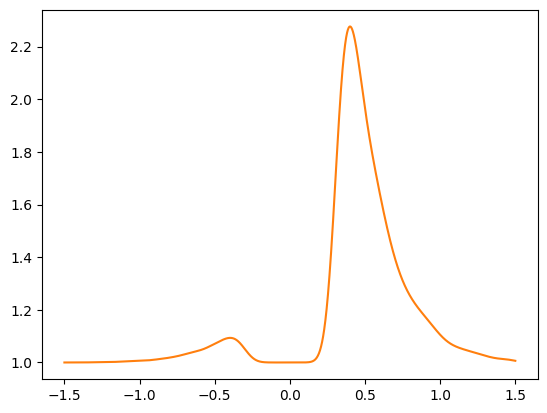

In [61]:
kde_c = stats.gaussian_kde(samps["RT"])(t_kde)
plt.plot(t_kde,kde_c/2+1, color = '#ff7f0e', label = "DDM")


(array([[1832.,    0.,    0.,    0.,    0.,    0.,    0.,    0., 8167.,
            0.],
        [   0.,    0.,    0.,    0.,    0.,  457., 8065., 1302.,  160.,
           15.]]),
 array([-1.        , -0.7702779 , -0.54055579, -0.31083369, -0.08111159,
         0.14861051,  0.37833262,  0.60805472,  0.83777682,  1.06749892,
         1.29722103]),
 <a list of 2 BarContainer objects>)

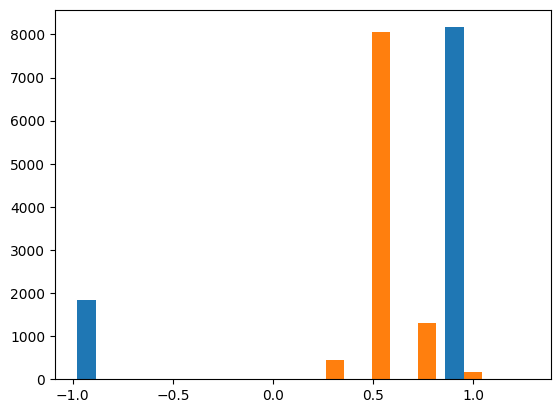

In [43]:
plt.hist(samps)

In [ ]:
DDM_params = [1.99, 0.68, 0.24]
OUM_params = [1.98, 3.12,9.60, 0.20]
SAT_plot(DDM_params, OUM_params)

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(12, 6))
DDM_SAT_plot(ax=axes[0])
OUM_SAT_plot(ax=axes[1])

In [168]:
def DDMc_SAT_plot(ax=None):
    if ax is None:
        ax = plt.gca()
    T_dur = 1.5
    
    ### speed condition
    model = Model(name='Simple model',
                  drift=DriftConstant(drift=1),
                  noise=NoiseConstant(noise=1),
                  bound=BoundCollapsingLinear(B=2,t = 1.5),
                  overlay=OverlayNonDecision(nondectime=.3),
                  dx=.001, dt=.001, T_dur=T_dur)
    sol = model.solve()
    samp = sol.resample(10000)
    samps = samp.to_pandas_dataframe(drop_undecided = True, choice_column_name='correct')

    #evidence = model.simulate_trial(seed=1)
    #t = np.arange(len(evidence))/1000
    #ax.plot(t,evidence, color = 'black')

    t_kde = np.arange(300,T_dur*1000)/1000
    #print(samps)

    c_prop = sum(samps['correct']==1)/len(samps['correct'])
    i_prop = sum(samps['correct']==0)/len(samps['correct'])

    kde_c = stats.gaussian_kde(samps[samps['correct']==1]['RT'])(t_kde)*c_prop
    kde_i = stats.gaussian_kde(samps[samps['correct']==0]['RT'])(t_kde)*i_prop
    
    
    # drift rate
    #ax.arrow(x=0.3, y=0, dx=(t[-1]-0.3), dy=1, 
    #          head_width=0.05, head_length=0.15,
    #          color = '#006CD1',length_includes_head = True, linewidth = 2)
    ax.text(x=0.6, y=0.4, s = "Drift Rate ($v$)", color = '#006CD1')
    
    # boundaries
    boundary = 2
    line1 = ax.plot(np.arange(0.3,1.5,0.001), -1.5*np.arange(0.3,1.5,0.001)+2.45,
              color = '#008176',linewidth = 2, linestyle = 'dashed')#, label = "Correct Boundary (Speed)")

    ax.plot(t_kde,kde_c/2+2,color = "black" ,linestyle = 'dashed')

    line2 = ax.plot(np.arange(0.3,1.5,0.001), 1.5*np.arange(0.3,1.5,0.001)-2.45,
              color = '#c1272d',linewidth = 2, linestyle = 'dashed')#, label = "Correct Boundary (Speed)")
    #ax.text(x=-0.1, y=-1.26, s = "Incorrect Boundary (Speed)", color = '#c1272d')
    #ax.plot(t_kde,-kde_i-1,color = "black")#,linestyle = 'dashed')
    #ax.text(x=1, y=-1.8, s = "Incorrect RT Distribution",color = "#c1272d")
    
    ### accuracy condition
    model = Model(name='Simple model',
                  drift=DriftConstant(drift=1),
                  noise=NoiseConstant(noise=1),
                  bound=BoundCollapsingLinear(B=2,t = 0.5),
                  overlay=OverlayNonDecision(nondectime=.3),
                  dx=.001, dt=.001, T_dur=T_dur)
    sol = model.solve()
    samp = sol.resample(10000)
    samps = samp.to_pandas_dataframe(drop_undecided = True, choice_column_name='correct')


    t_kde = np.arange(300,T_dur*1000)/1000
    
    c_prop = sum(samps['correct']==1)/len(samps['correct'])
    i_prop = sum(samps['correct']==0)/len(samps['correct'])

    kde_c = stats.gaussian_kde(samps[samps['correct']==1]['RT'])(t_kde)*c_prop
    kde_i = stats.gaussian_kde(samps[samps['correct']==0]['RT'])(t_kde)*i_prop
    
    evidence = model.simulate_trial(seed=1)
    t = np.arange(len(evidence))/1000    
    ax.plot(t,evidence, color = 'black')
    
    # drift rate
    ax.arrow(x=0.3, y=0, dx=(t[-1]-0.3), dy=evidence[-1], 
              head_width=0.05, head_length=0.15,
              color = '#006CD1',length_includes_head = True, linewidth = 2)

    # boundaries
    line3 = ax.axhline(y = 2, xmin=0, xmax=0.2, color = '#008176',linewidth = 2, label = "Correct Boundary (Accuracy)")
    #ax.text(x=-0.1, y=2.2, s = "Correct Boundary (Accuracy)", color = '#008176')
    ax.plot(t_kde,kde_c/2+2,color = "black")#,linestyle = 'dotted')
    
    line4 = ax.axhline(y = -2, xmin=0, xmax=0.2, color = '#c1272d',linewidth = 2, label= "Incorrect Boundary (Accuracy)")
    line5 = ax.plot(np.arange(0.3,1.5,0.001), -0.5*np.arange(0.3,1.5,0.001)+2.15,
              color = '#008176',linewidth = 2)#, label = "Correct Boundary (Speed)")    
    line6 = ax.plot(np.arange(0.3,1.5,0.001), 0.5*np.arange(0.3,1.5,0.001)-2.15,
              color = '#c1272d',linewidth = 2)#, label = "Correct Boundary (Speed)")
    
    # plot limit
    ax.set_xlim(0,T_dur)
    ax.set_ylim(-3,3)
    ax.axis('off')
    ax.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
    ax.set_title("Drift-Diffusion Model with Linear Collapsing Boundary")

    # ndt
    ax.arrow(x=0.15, y=-0.15, dx=0, dy=-0.001, color = 'black',
              head_width=0.1, head_length=0.2)
    ax.text(x=0, y=-0.6, s = "Non-decision Time")
    #ax.legend(handles=[line1, line3, line2, line4], loc = "upper left")

    return(ax)


<Axes: title={'center': 'Drift-Diffusion Model with Linear Collapsing Boundary'}>

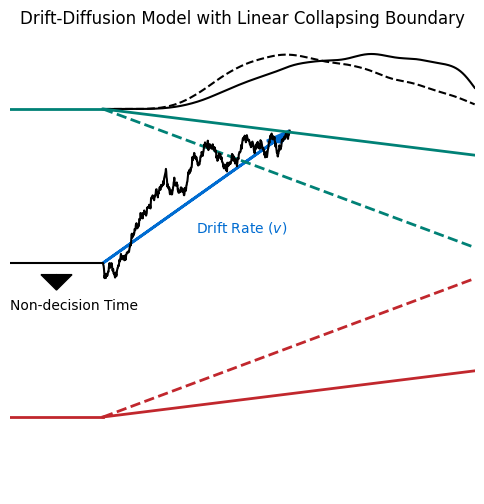

In [169]:
fig, axes = plt.subplots(figsize=(6, 6))
DDMc_SAT_plot(ax=axes)